importing the libraries first as we always do


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt



for reading the data 

In [38]:
data = pd.read_csv('/content/data (1).csv')

In [39]:
data.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


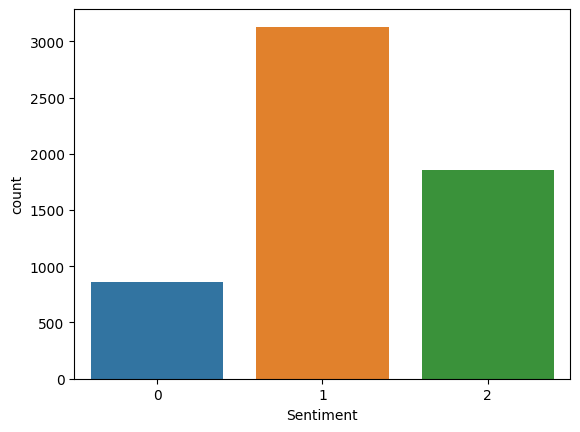

In [52]:
sns.countplot(x ='Sentiment', data = data)
plt.show()

In [40]:
label_encoder=preprocessing.LabelEncoder()
data['Sentiment']=label_encoder.fit_transform(data["Sentiment"])
data[['Sentiment']]

,Sentiment
0,2
1,0
2,2
3,1
4,1
...,...
5837,0
5838,1
5839,1
5840,1


In [41]:
train_data, test_data, train_labels, test_labels = train_test_split(data['Sentence'], data['Sentiment'], test_size=0.2, random_state=42)

In [42]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(train_data)
test_vectors = vectorizer.transform(test_data)

In [43]:
svm_model = SVC(kernel='linear')
svm_model.fit(train_vectors, train_labels)

SVC(kernel='linear')

In [44]:
predicted_labels = svm_model.predict(test_vectors)

In [45]:
report = classification_report(test_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.48      0.17      0.25       175
           1       0.72      0.91      0.80       622
           2       0.78      0.67      0.72       372

    accuracy                           0.72      1169
   macro avg       0.66      0.58      0.59      1169
weighted avg       0.70      0.72      0.69      1169



In [53]:
new_review = "This bank provides a good service."
new_review_vector = vectorizer.transform([new_review])
predicted_label = svm_model.predict(new_review_vector)
predicted_sentiment_new = label_encoder.inverse_transform(predicted_label)
print(predicted_sentiment_new)

['positive']


In [47]:
accuracy = accuracy_score(test_labels, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.7219846022241232
